# Thai2Vec Embeddings Examples

We use the embeddings from `v0.1` since it was trained specifically for word2vec as opposed to latter versions which garner to classification. The `thai2vec.bin` 51,556 word embeddings of 300 dimensions, in descending order by their frequencies (See `thai2vec.vocab`). The files are in word2vec format readable by `gensim`. Most common applications include word vector visualization, word arithmetic, word grouping, cosine similarity and sentence or document vectors. For sample code, see `thwiki_lm/word2vec_examples.ipynb`.

## Imports

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pythainlp.tokenize import word_tokenize
from gensim.models import KeyedVectors
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import dill as pickle
import pandas as pd

DATA_PATH='../lm_data/'
MODEL_PATH = f'{model_}models/'
MISC_PATH = f'{DATA_PATH}misc/'

In [8]:
#load into gensim
model = KeyedVectors.load_word2vec_format(f'{MODEL_PATH}thai2vec.bin',binary=True)
#create dataframe
thai2dict = {}
for word in model.index2word:
    thai2dict[word] = model[word]
thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
thai2vec.head(10)

0         1         2          3          4          5    \
xxunk     9.412697 -0.488594 -3.401881 -42.730244  35.064205 -26.100941   
xxpad     3.876736 -0.049269 -0.021756 -33.481445  31.611290 -20.919840   
xxspace  10.631902 -3.973876 -1.743042 -42.599854  34.616451 -26.990564   
1         9.687781 -3.374289 -5.566193 -41.561626  36.881172 -28.293665   
xxeol    10.076826 -3.298112 -3.062871 -42.180008  34.165661 -27.856457   
xxfld    14.899630 -1.930843  2.001746 -42.514164  38.589172 -29.482353   
ใน        9.683018 -1.806045 -3.538491 -42.151825  34.464622 -28.008196   
ที่       9.770124 -4.167158 -0.651670 -42.355728  36.287140 -26.348225   
และ       9.779366 -4.125625 -5.410614 -42.443588  35.464420 -26.667896   
เป็น      8.904553 -3.972028  0.898944 -41.665886  35.541092 -28.023504   

               6          7          8         9      ...          390  \
xxunk    -3.747117  15.602914  37.966507  1.014693    ...    -6.495045   
xxpad    -0.508237  14.074152  32.848042 -1.403501    ...     1.038427   
xxspace  10.954692  14.398766  37.990967 -3.763945    ...    -1.278642   
1        -1.500996  15.841971  39.105003 -0.694619    ...     0.800407   
xxeol     6.696773  15.293684  38.029015 -4.269083    ...    -0.678904   
xxfld    -3.962751   3.097306  39.768669 -0.693229    ...     3.201032   
ใน       -2.961989  14.223104  37.152637  1.243370    ...     0.138160   
ที่      -2.798183  15.309365  37.787487 -1.505493    ...    -0.002396   
และ       2.241813  13.938269  37.312401 -4.813928    ...    -0.503761   
เป็น     -3.800491  16.072670  38.580750 -2.286343    ...     2.570196   

               391        392       393       394        395        396  \
xxunk   -25.819569  38.371155  6.613634  1.742496  -9.713803 -12.573798   
xxpad   -19.635546  29.998386  7.486456  0.269155 -11.942196  -4.076655   
xxspace -25.836325  40.264915  7.057155  1.878293  -9.766123 -11.934086   
1       -26.646166  42.336922  7.244391  1.356798 -10.226693 -12.592010   
xxeol   -25.555805  40.705482  7.259528  1.353030 -14.982669 -13.479355   
xxfld   -22.658134  44.450848  6.989926 -1.499702  -7.791940  -4.544464   
ใน      -26.050760  38.420036  7.372793  2.484624 -11.345880 -17.197050   
ที่     -26.294212  39.143227  7.409772  1.725253 -10.572651 -18.086336   
และ     -25.952402  38.727116  7.179166  2.370239  -8.047087 -15.263973   
เป็น    -25.606272  39.234039  7.785551  1.330086 -12.832536 -14.681183   

              397        398       399  
xxunk    1.576579 -20.847286 -1.370693  
xxpad   -0.319159 -13.353608 -0.664269  
xxspace  0.281595 -21.392384 -2.502031  
1       -1.624527 -21.064072 -9.900548  
xxeol   -0.881967 -20.467594 -5.054183  
xxfld    0.243512 -23.966330 -6.069082  
ใน      -0.729840 -20.466942 -0.287305  
ที่     -0.444782 -21.733566 -4.995567  
และ      2.641281 -21.697216 -2.367746  
เป็น    -1.536232 -21.056726 -2.545995  

[10 rows x 400 columns]

Using t-SNE, we can compress the 400 dimensions of each word into a 2D plane and plot their relationships.

In [9]:
labels = model.index2word

# #tnse
# tsne = TSNE(n_components=2, init='pca', n_iter=1000)
# thai2plot = tsne.fit_transform(thai2vec)
# pickle.dump(thai2plot,open(f'{MODEL_PATH}thai2plot.pkl','wb'))

thai2plot = pickle.load(open(f'{MODEL_PATH}thai2plot.pkl','rb'))

In [10]:
labels[:10]

['xxunk',
 'xxpad',
 'xxspace',
 '1',
 'xxeol',
 'xxfld',
 'ใน',
 'ที่',
 'และ',
 'เป็น']

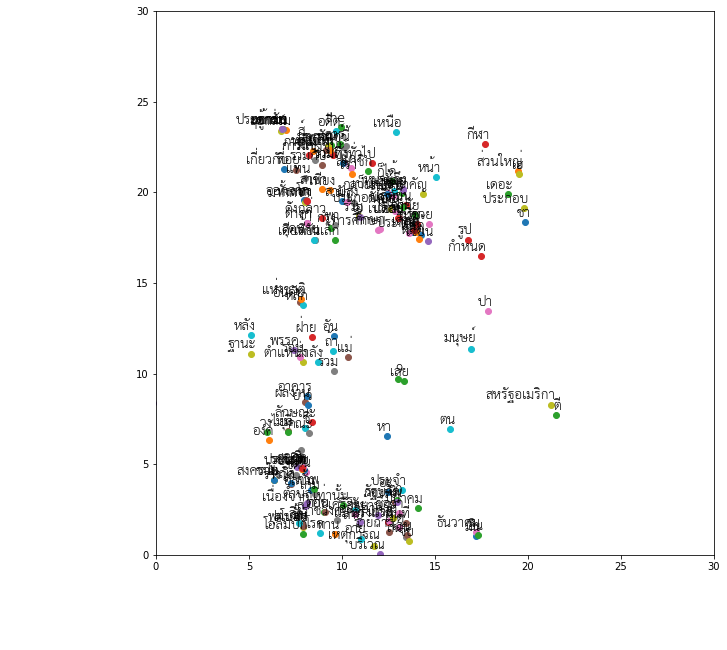

In [11]:
#stolen from https://blog.manash.me/how-to-use-pre-trained-word-vectors-from-facebooks-fasttext-a71e6d55f27
def plot_with_labels(low_dim_embs, labels, filename, figsize=(10,10),
                    axis_lims = None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'{MISC_PATH}THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    if axis_lims is not None: plt.axis(axis_lims)
    plt.savefig(filename)
    
plot_with_labels(thai2plot[200:500],labels[200:500],f'{MISC_PATH}random.png',axis_lims = [0,30,0,30])

## Word Arithmetic

You can do simple "arithmetic" with words based on the word vectors such as:
* ผู้หญิง + พระราชา - ผู้ชาย = พระราชินี
* นายกรัฐมนตรี - อำนาจ = ประธานาธิบดี
* กิ้งก่า + โบราณ = ไดโนเสาร์

In [12]:
#word arithmetic
model.most_similar_cosmul(positive=['พระราชา','ผู้หญิง'], negative=['ผู้ชาย'])

[('พระราชินี', 0.9981504082679749),
 ('กษัตริย์', 0.9967206716537476),
 ('พระมหากษัตริย์', 0.996286928653717),
 ('ขุนนาง', 0.9961567521095276),
 ('พระพุทธเจ้าหลวง', 0.9960739612579346),
 ('พระเจ้า', 0.9960610270500183),
 ('พระนาง', 0.9960603713989258),
 ('พระนารายณ์', 0.9960383772850037),
 ('เจ้าหญิง', 0.9960342645645142),
 ('จักรวรรดิ', 0.9960323572158813)]

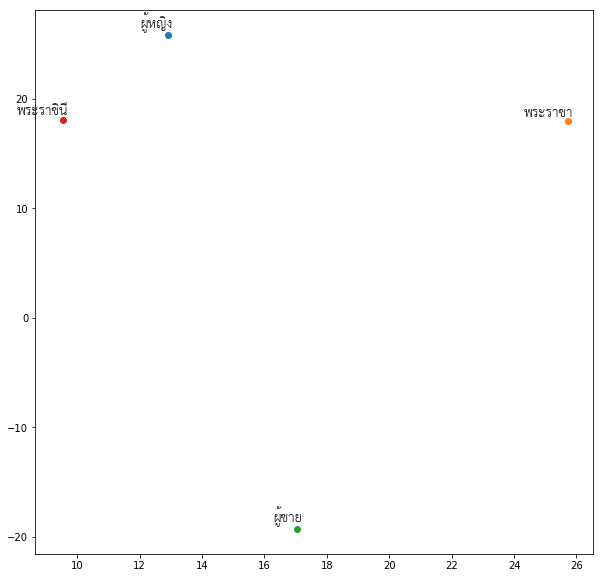

In [13]:
sample_words = ['ผู้หญิง','พระราชา','ผู้ชาย','พระราชินี']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}word_arithematic1.png')

In [14]:
model.most_similar_cosmul(positive=['นายกรัฐมนตรี'],negative=['อำนาจ'])

[('ประธานาธิบดี', 1.0023722648620605),
 ('กองหลัง', 1.0022333860397339),
 ('รัฐมนตรีว่าการกระทรวงอุตสาหกรรม', 1.00214684009552),
 ('หัวหน้าพรรค', 1.0021411180496216),
 ('สมาชิกสภาผู้แทนราษฎร', 1.0021156072616577),
 ('กองกลาง', 1.002044677734375),
 ('ครูใหญ่', 1.002013921737671),
 ('ประธานกรรมการ', 1.0019348859786987),
 ('รัฐมนตรี', 1.0019291639328003),
 ('รองนายกรัฐมนตรี', 1.0018199682235718)]

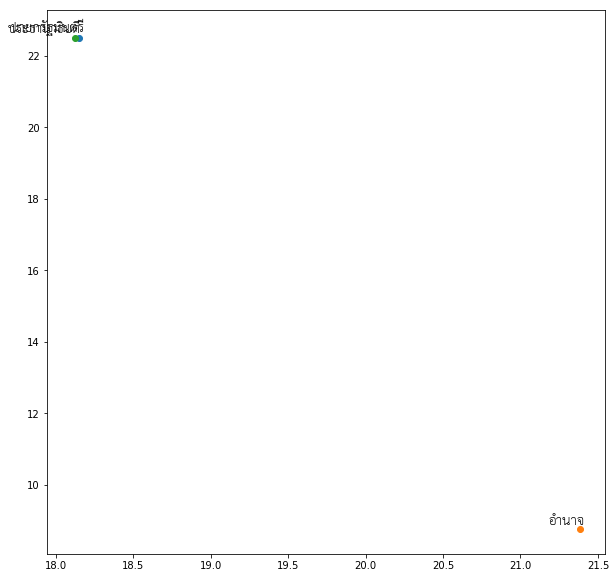

In [33]:
sample_words = ['นายกรัฐมนตรี','อำนาจ','ประธานาธิบดี']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}word_arithematic2.png')

In [66]:
#word arithmetic
model.most_similar_cosmul(positive=['สัตว์','พืช'], negative=[])

[('สิ่งมีชีวิต', 0.9962559342384338),
 ('ต้นไม้', 0.9952865839004517),
 ('โครงสร้าง', 0.9952232241630554),
 ('แมลง', 0.9951112866401672),
 ('อาหาร', 0.9949089288711548),
 ('อุปกรณ์', 0.9948516488075256),
 ('บุคคล', 0.9948450326919556),
 ('ศิลปะ', 0.9948193430900574),
 ('วัสดุ', 0.994814395904541),
 ('เนื้อ', 0.9947746396064758)]

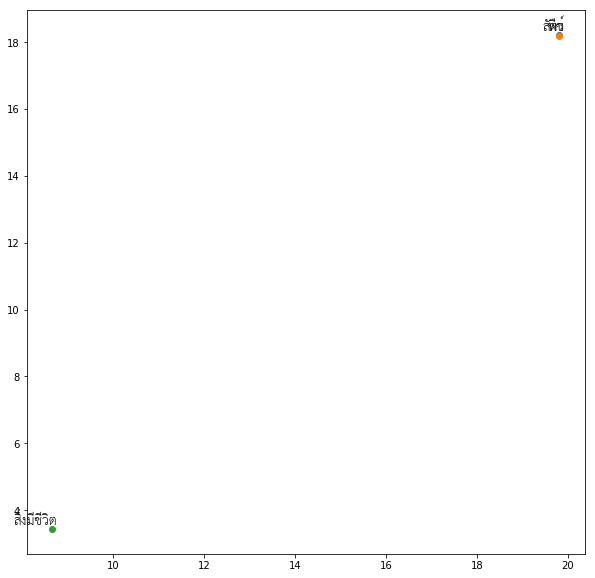

In [67]:
sample_words = ['สัตว์','พืช','สิ่งมีชีวิต']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}word_arithematic_baseball.png')

## Doesn't Match

It can also be used to do word groupings. For instance:
* อาหารเช้า อาหารสัตว์ อาหารเย็น อาหารกลางวัน - อาหารสัตว์ is type of food whereas others are meals in the day
* ลาก ดึง ดูด ดัน - ดัน is pushing while the rest is pulling.
* กด กัด กิน เคี้ยว - กด is not verbs for the eating process
Note that this could be relying on a different "take" than you would expect. For example, you could have answered ลูกเขย in the second example because it  is the one associated with male gender.

In [68]:
model.doesnt_match("อาหารเช้า อาหารสัตว์ อาหารเย็น อาหารกลางวัน".split())

'อาหารสัตว์'

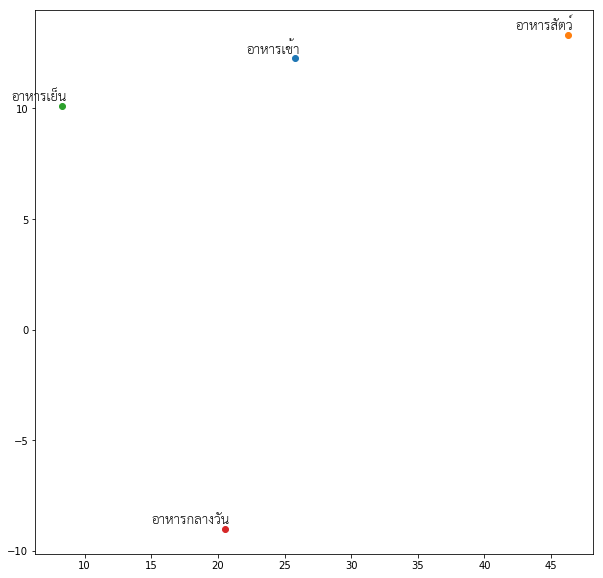

In [69]:
sample_words = "อาหารเช้า อาหารสัตว์ อาหารเย็น อาหารกลางวัน".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}doesnt_match1.png')

In [70]:
model.doesnt_match("ลาก ดึง ดูด ดัน".split())

'ดัน'

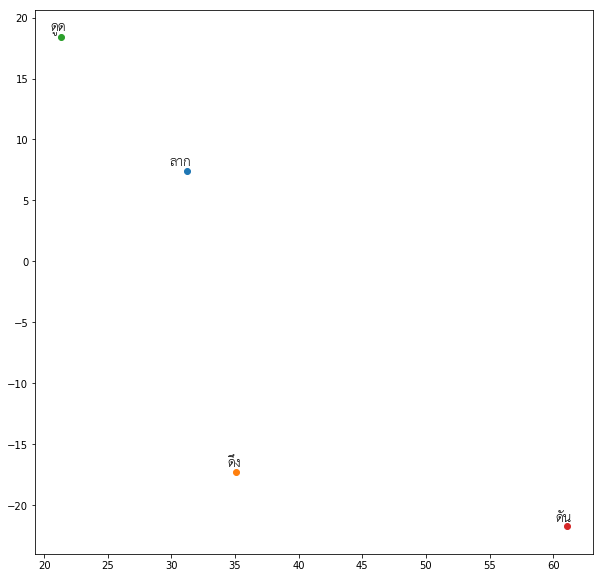

In [71]:
sample_words = "ลาก ดึง ดูด ดัน".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}doesnt_match2.png')

In [72]:
model.doesnt_match("แมว หมา หมู หมอ".split())

'หมอ'

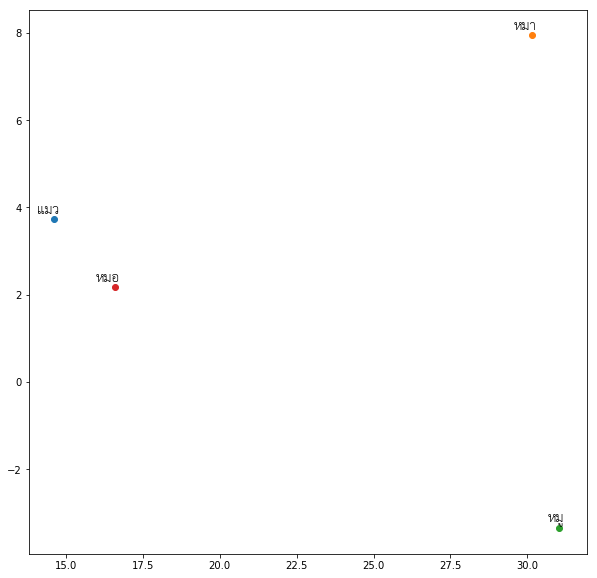

In [73]:
sample_words = "แมว หมา หมู หมอ".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}doesnt_match3.png')

## Cosine Similarity

In [78]:
print('Country + its capital:', model.similarity('ปักกิ่ง', 'จีน'))
print('Country + its capital:', model.similarity('กรุง','อิตาลี'))
print('One capital and another:', model.similarity('โรม', 'ปักกิ่ง'))

Country + its capital: 0.9901805597638698
Country + its capital: 0.9903342338260549
One capital and another: 0.9924441170511737


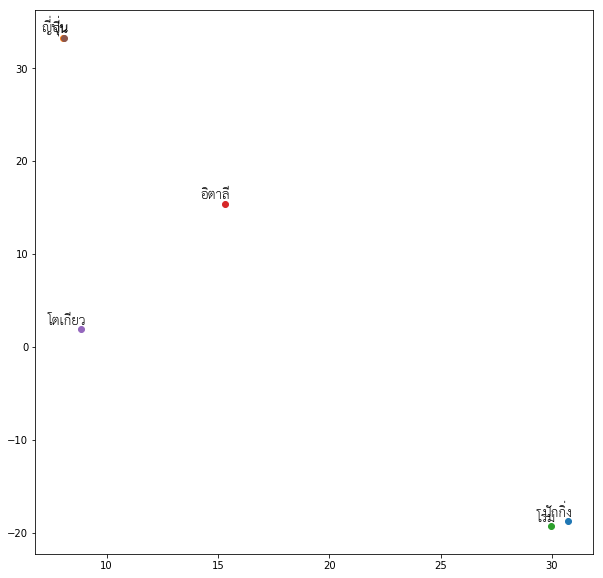

In [79]:
sample_words = "ปักกิ่ง จีน โรม อิตาลี โตเกียว ญี่ปุ่น".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{MISC_PATH}cosine_sim.png')

## Spellchecking

Originally contributed by [Sakares ATV](https://github.com/sakares), adapted from [Kaggle Spell Checker using Word2vec by CPMP](https://www.kaggle.com/cpmpml/spell-checker-using-word2vec).

In [80]:
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [81]:
thai_letters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮะัาำิีึืุูเแโใไ็่้๊๋์'

def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = thai_letters
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [82]:
correction('พัดนา')

'พัฒนา'

In [83]:
correction('ขริง')

'จริง'

In [84]:
correction('จย้า')

'จ้า'

In [85]:
correction('นะค่ะ')

'นะคะ'